In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


In [2]:
df=pd.read_csv(r'/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [4]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

In [5]:
df.Resume[1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

# Data Preprocessing

### Text Preparation

In [6]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText
    

In [7]:
df['Resume'] = df['Resume'].apply(cleanResume)
df.Resume[0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [8]:
df.Resume[0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [9]:
df1=df.copy()

### Spelling correction


# Data Visualization

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(22, 16)})

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[Text(0, 0, 'Data Science'),
 Text(1, 0, 'HR'),
 Text(2, 0, 'Advocate'),
 Text(3, 0, 'Arts'),
 Text(4, 0, 'Web Designing'),
 Text(5, 0, 'Mechanical Engineer'),
 Text(6, 0, 'Sales'),
 Text(7, 0, 'Health and fitness'),
 Text(8, 0, 'Civil Engineer'),
 Text(9, 0, 'Java Developer'),
 Text(10, 0, 'Business Analyst'),
 Text(11, 0, 'SAP Developer'),
 Text(12, 0, 'Automation Testing'),
 Text(13, 0, 'Electrical Engineering'),
 Text(14, 0, 'Operations Manager'),
 Text(15, 0, 'Python Developer'),
 Text(16, 0, 'DevOps Engineer'),
 Text(17, 0, 'Network Security Engineer'),
 Text(18, 0, 'PMO'),
 Text(19, 0, 'Database'),
 Text(20, 0, 'Hadoop'),
 Text(21, 0, 'ETL Developer'),
 Text(22, 0, 'DotNet Developer'),
 Text(23, 0, 'Blockchain'),
 Text(24, 0, 'Testing')]

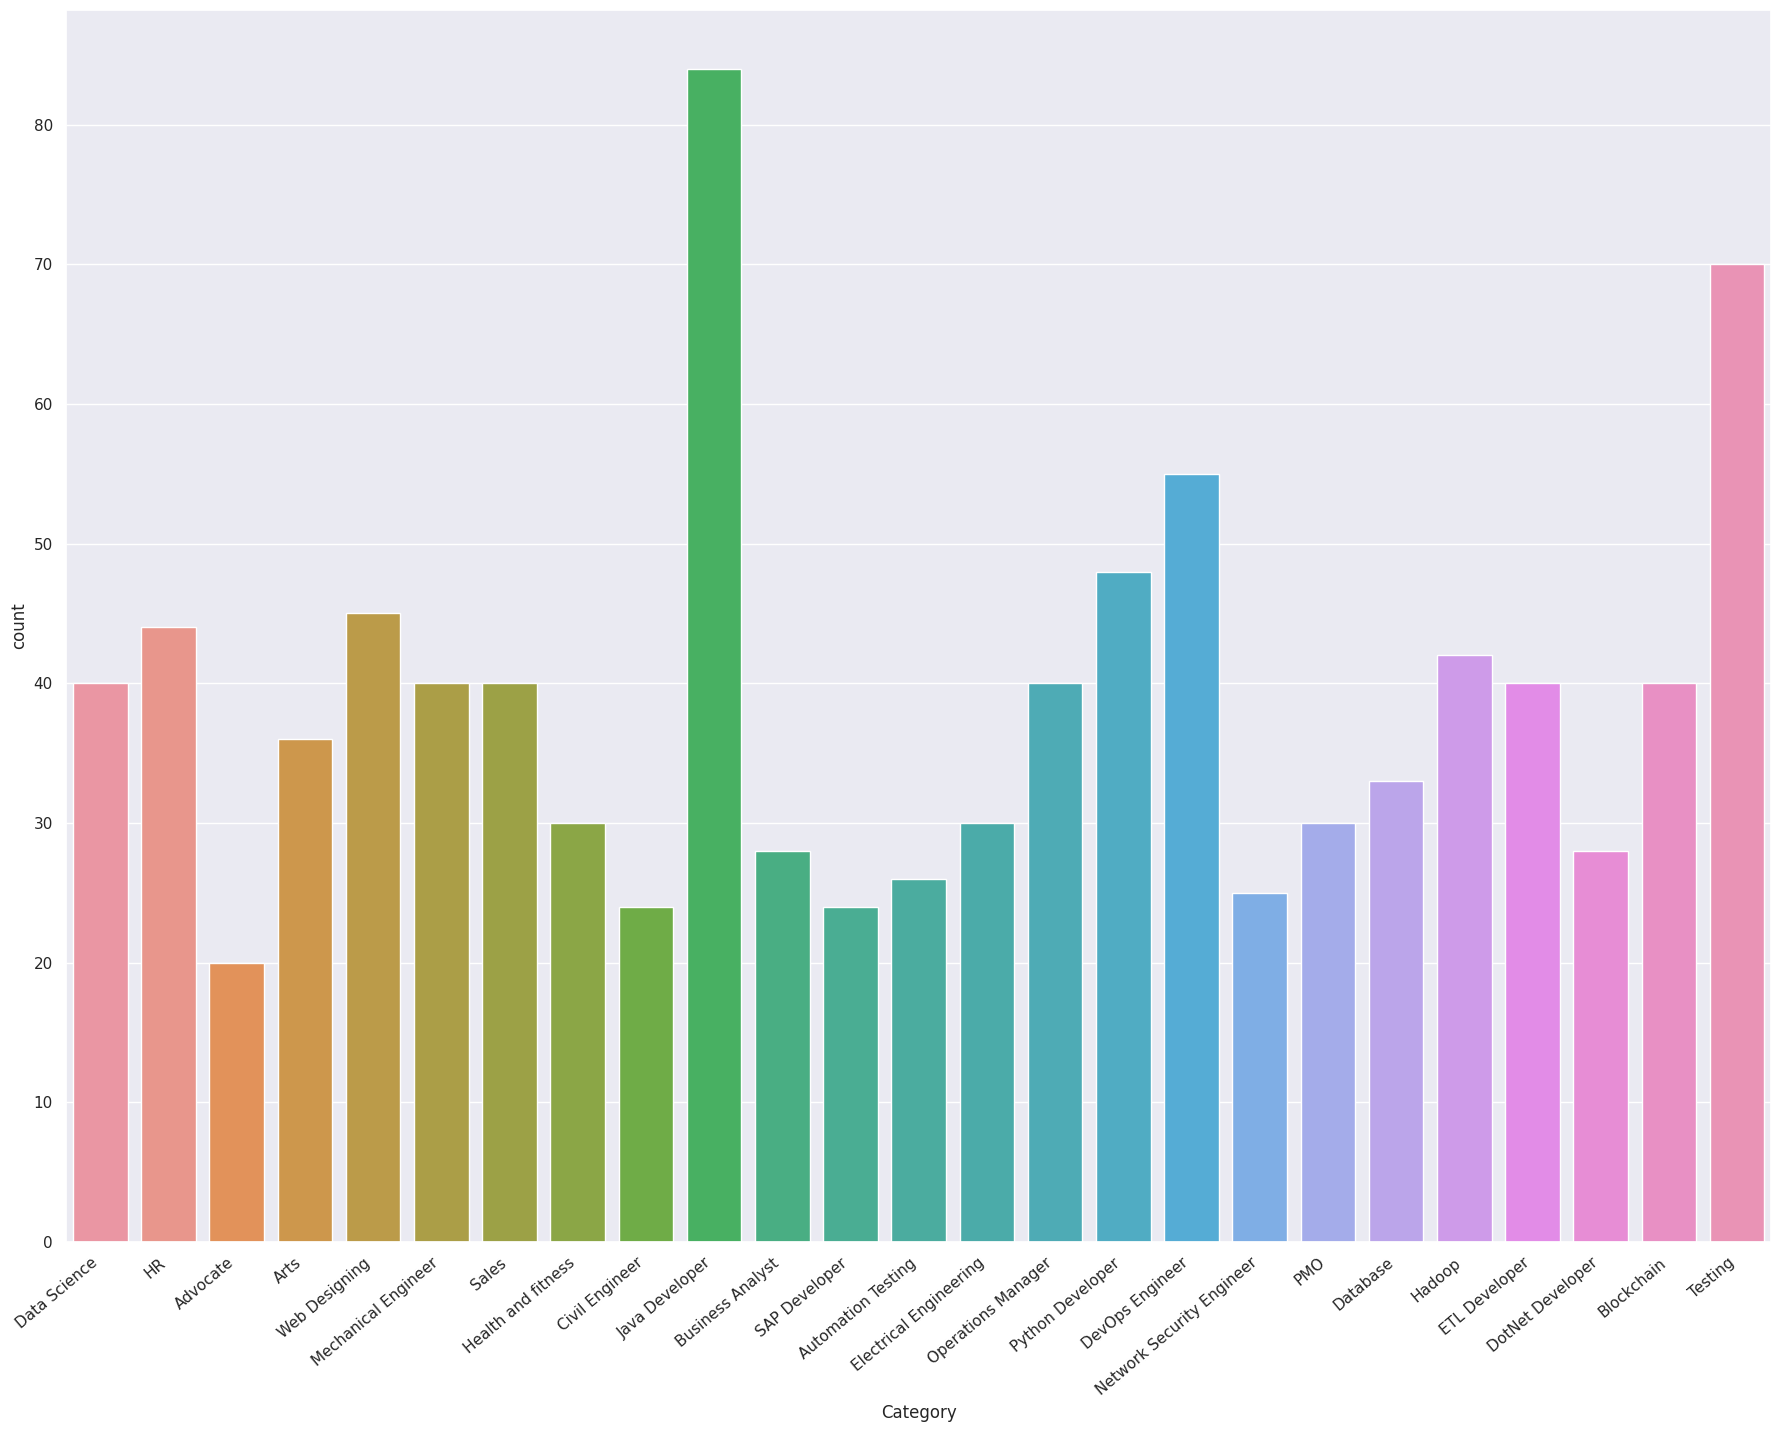

In [14]:
ax=sns.countplot(x=df.Category)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [15]:
df['Length']=df.Resume.apply(len)

<Axes: xlabel='Length', ylabel='Category'>

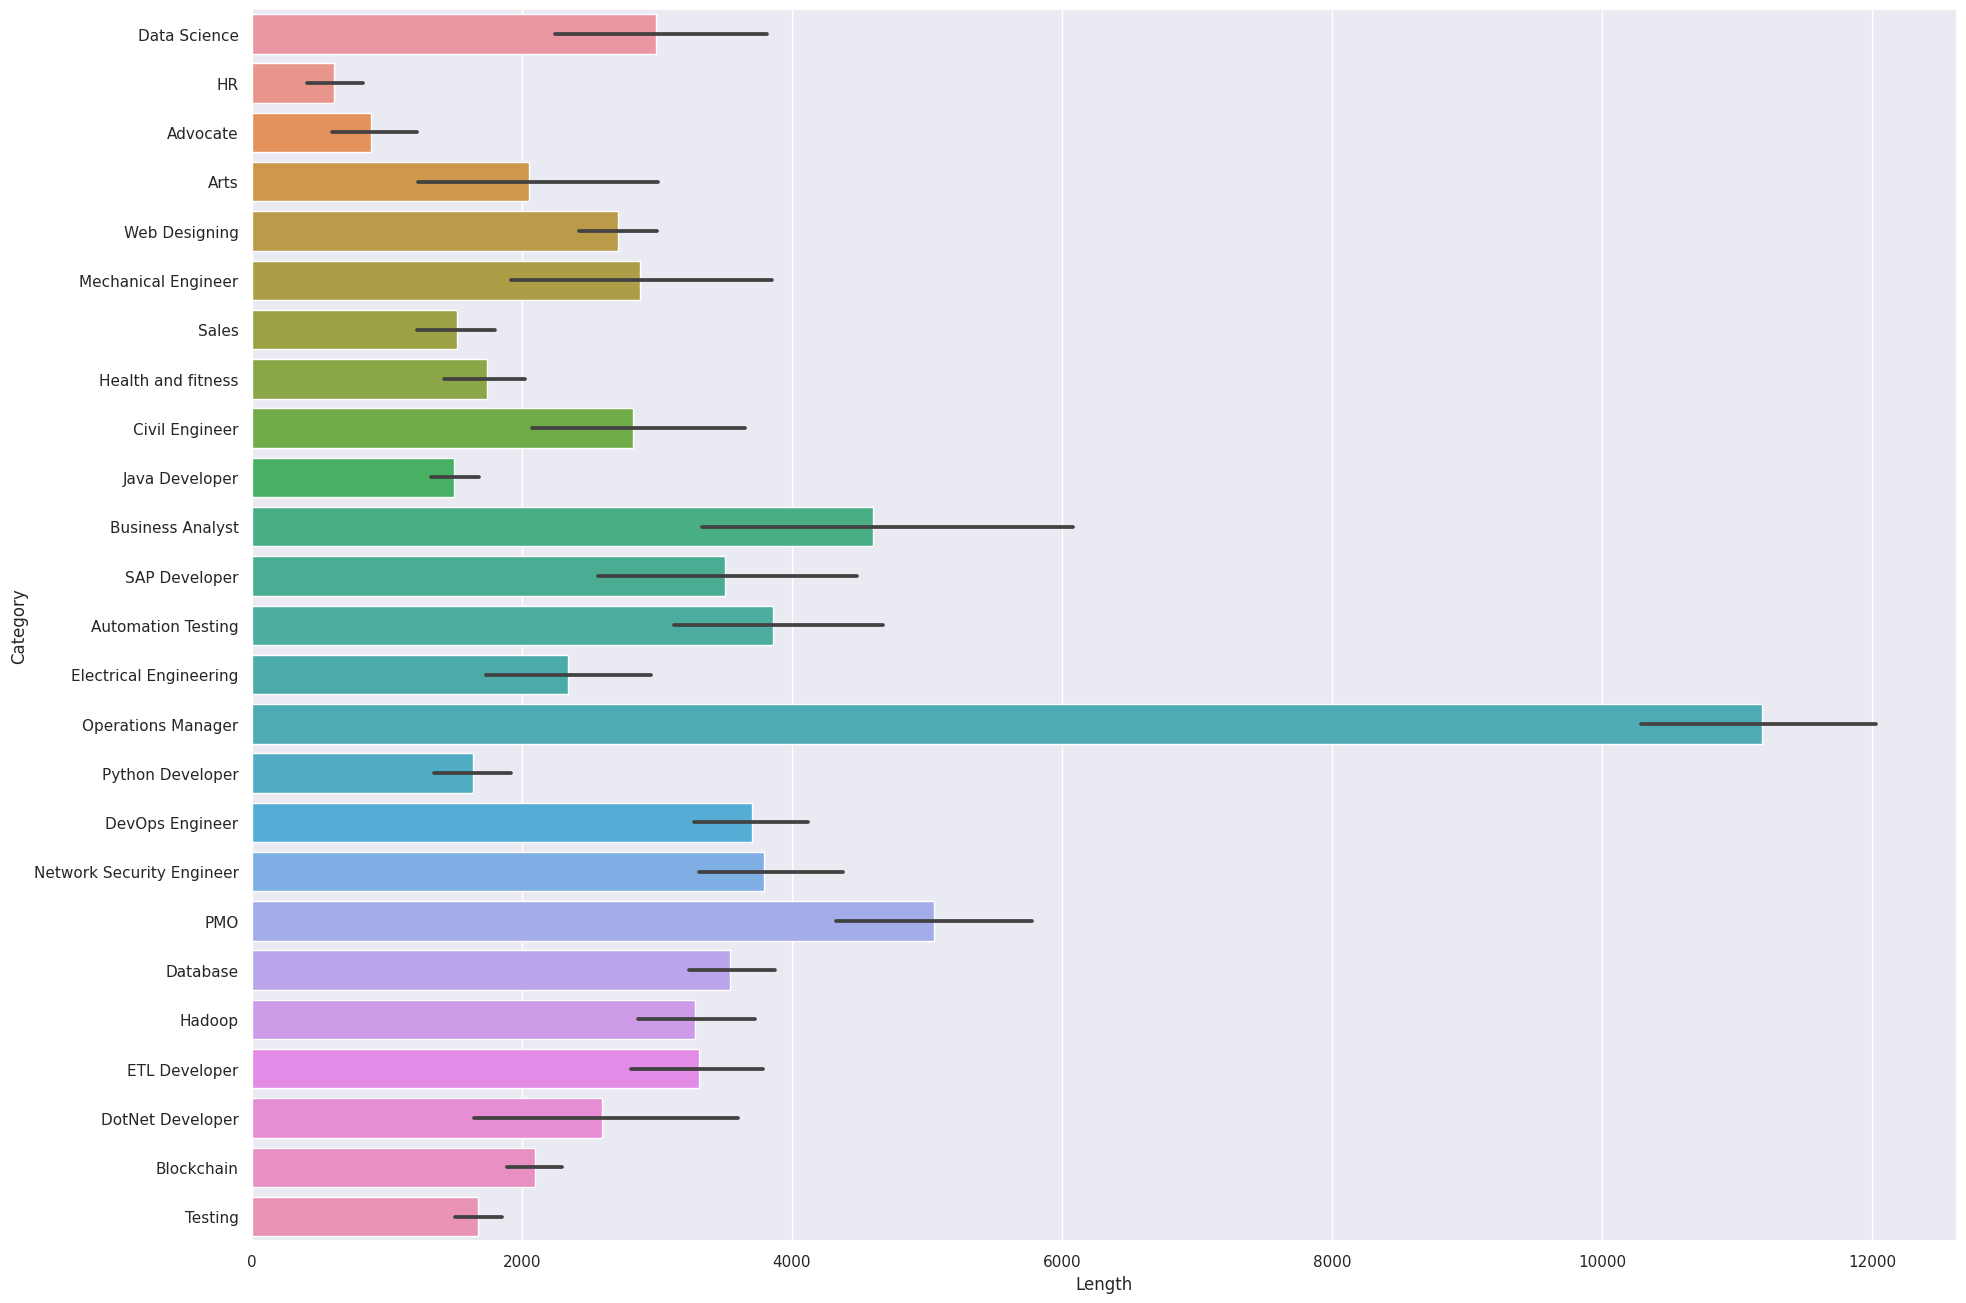

In [16]:
sns.barplot(y='Category',x='Length',data=df)

In [17]:
means={}
for category in df.Category.unique():
    means[category]=df.loc[df['Category'] == category].Length.mean()

df_mean = pd.DataFrame(list(means.items()), columns=['Category', 'Mean'])
df_mean

,Category,Mean
0,Data Science,2995.300000
1,HR,612.000000
2,Advocate,882.000000
3,Arts,2054.666667
4,Web Designing,2712.600000
5,Mechanical Engineer,2876.400000
6,Sales,1517.800000
7,Health and fitness,1738.500000
8,Civil Engineer,2824.000000
9,Java Developer,1498.500000


### Trying out other preprocessing techniques

#### Stemming

In [29]:
import nltk
from nltk.stem import PorterStemmer
from nltk import punkt

In [30]:
stemmer = PorterStemmer()
def stem_text(text):
    tokens = nltk.word_tokenize(text.lower())
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [31]:
df1['Resume'] = df1['Resume'].apply(stem_text)

In [32]:
df['Resume'][0][:100]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript J'

In [33]:
df1['Resume'][0][:100]

'skill program languag python panda numpi scipi scikit learn matplotlib sql java javascript jqueri ma'

#### Lemmatization

In [36]:
from nltk.corpus import wordnet
from nltk import *

In [37]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [41]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [42]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [43]:
df1['Resume'] = df1['Resume'].apply(lemmatize_text)

LookupError: 
**********************************************************************
  Resource 'corpora/wordnet' not found.  Please use the NLTK
  Downloader to obtain the resource:  >>> nltk.download()
  Searched in:
    - '/root/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************

# Vectorization

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredText = tfidf.transform(df['Resume'])

In [45]:
requredText.shape

(962, 7351)

# Splitting

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredText, df['Category'], test_size=0.2, random_state=42)

# Training

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [48]:
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', OneVsRestClassifier(KNeighborsClassifier()))
]

# Iterate through classifiers, fit, predict, and print accuracy
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name}: Accuracy = {accuracy}')

Logistic Regression: Accuracy = 0.9948186528497409
Decision Tree: Accuracy = 0.9948186528497409
Random Forest: Accuracy = 0.9948186528497409
Gradient Boosting: Accuracy = 1.0
K-Nearest Neighbors: Accuracy = 0.9844559585492227


In [51]:
final_model=classifiers[3][1]
final_model

GradientBoostingClassifier()

# Using length of resume as feature

In [ ]:
# y=df.Category
# X = df[['Resume', 'Length']]

In [ ]:
# X_train, X_test, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # TF-IDF vectorization for 'Resume' column
# tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['Resume'])
# X_test_tfidf = tfidf_vectorizer.transform(X_test['Resume'])

# # Combine 'Length' column with TF-IDF features
# X_train_combined = hstack((X_train_tfidf, X_train['Length'].values.reshape(-1, 1)))
# X_test_combined = hstack((X_test_tfidf, X_test['Length'].values.reshape(-1, 1)))

# # Now, X_train_combined and X_test_combined contain both TF-IDF and 'Length' features
# # You can use these for training and testing your machine learning model

# # Example: Display the shape of the combined feature matrices
# print("X_train_combined shape:", X_train_combined.shape)
# print("X_test_combined shape:", X_test_combined.shape)

In [ ]:
# clf = OneVsRestClassifier(KNeighborsClassifier())
# clf.fit(X_train_combined,y_train1)
# ypred = clf.predict(X_test_combined)
# print(accuracy_score(y_test1,ypred))

##### As accuracy dropped by 10% we will ignore length as a feature

In [ ]:
!pip install pycaret
# !pip install ipywidgets

In [ ]:
!pip install pycaret -q

In [ ]:
# from pycaret.classification import *

# Saving model

In [52]:
import pickle
saved_objects = {
    'tfidf_vectorizer': tfidf,
    'model': final_model
}

# Save the dictionary to a file
with open('model_and_tfidf.pkl', 'wb') as file:
    pickle.dump(saved_objects, file)